In [1]:
# Import dependencsummer_df = pd.read_csv(t matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
#import geopandas as gpd

# Read csv file and store into dataframe:
# TODO : Put these sources 
complete_df = pd.read_csv("../Resources/athlete_events.csv")
summer_df = pd.read_csv("../Resources/olympic_host_summer.csv")
winter_df = pd.read_csv("../Resources/olympic_host_winter.csv")


cleaned_up_ht_wt = complete_df.dropna(subset= ["Height", "Weight",  "Medal"] )
summer_df
grp_by_summer_country = summer_df.groupby(['Country']).count()
print ("Summer Countries Hosts")
grp_by_summer_country

#type(grp_by_summer_country)

Summer Countries Hosts


,Year
Country,
Australia,1
Germany,1
Greece,1
Italy,1
Japan,1
Mexico,1
USA,1
USSR,1
Australia,1


In [2]:
grp_by_winter_country = winter_df.groupby(['Country']).count()
print ('Winter Country Host')
grp_by_winter_country

Winter Country Host


,Year
Country,
Austria,2
Canada,2
France,3
Germany,1
Italy,2
Japan,2
Norway,2
Russia,1
South Korea,1


In [3]:
summer_tally = pd.merge(cleaned_up_ht_wt[["Name", "Year"]], summer_df, on="Year")
#summer_tally 


In [4]:
winter_tally = pd.merge(cleaned_up_ht_wt[["Name", "Year"]], winter_df, on="Year")
#winter_tally 


In [5]:
#win_summer_df = summer_tally.groupby(['Country'])['Country'].count()
win_summer_df = summer_tally.groupby(['Country']).count()

win_summer_df 

#win_summer_df.plot.bar()
#name of the country on x/y axis 
#TODO see if average / times held 
summer_tally_weighted = pd.merge(win_summer_df,grp_by_summer_country , on="Country")
summer_tally_weighted["weighted tally"] = summer_tally_weighted["Name"] / summer_tally_weighted["Year_y"]
#summer_tally_weighted.plot.xlabel("Medal count")
summer_tally_weighted.rename(columns = {'Year_x':'Total Medals'}, inplace = True) 
summer_tally_weighted.plot.bar(y="Total Medals")
summer_tally_weighted.plot.bar(y="weighted tally")
country_list_summer = list(summer_tally_weighted.index.values) 
#print(country_list_summer)

['Austria', 'Canada', 'France', 'Germany', 'Italy', 'Japan', 'Norway', 'Russia', 'Switzerland', 'United States', 'Yugoslavia']


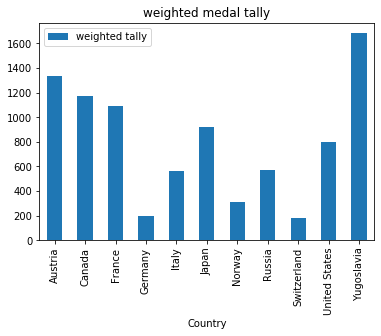

In [7]:
win_winter_df = winter_tally.groupby(['Country']).count()

win_winter_df 

#win_summer_df.plot.bar()
#name of the country on x/y axis 
#TODO see if average / times held 
winter_tally_weighted = pd.merge(win_winter_df,grp_by_winter_country , on="Country")
winter_tally_weighted["weighted tally"] = winter_tally_weighted["Name"] / winter_tally_weighted["Year_y"]
winter_tally_weighted.plot.bar(y="weighted tally" ,title="weighted medal tally")
#print(winter_tally_weighted)
#print(type(winter_tally_weighted))
#country_list=  winter_tally_weighted["Country"]
country_list = list(winter_tally_weighted.index.values) 
print(country_list)

# The data was verified by looking up values on google. 
# Yugoslavia is the outlier since several western countries
# had boycotted the olympics


In [9]:
summer_list = cleaned_up_ht_wt.loc[cleaned_up_ht_wt['Season'] == 'Summer']
winter_list = cleaned_up_ht_wt.loc[cleaned_up_ht_wt['Season'] == 'Winter']
winter_list = winter_list.Team.unique()
winter_list = list(winter_list)
summer_list = summer_list.Team.unique()
summer_list = list(summer_list)


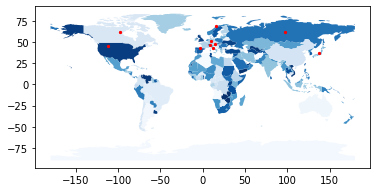

In [12]:
import geopandas as gpd

# Access built-in Natural Earth data via GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
select_country = world.loc[world['name'].isin(country_list)]
select_US  = world.loc[world['name'] == "United States of America"]
select_country = pd.concat([select_country, select_US])
select_country

# Get a list (dataframe) of country centroids
centroids = select_country.centroid 
centroid_list = pd.concat([select_country.name, centroids], axis=1)
# Plot the results
base = world.plot(column = 'name', cmap = 'Blues')
centroids.plot(ax = base, marker = 'o', color = 'red', markersize = 5)

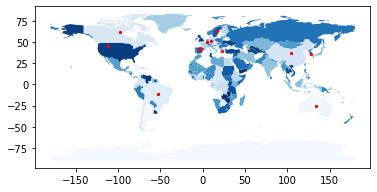

In [15]:

# Access built-in Natural Earth data via GeoPandas
select_country = world.loc[world['name'].isin(country_list_summer)]
select_US  = world.loc[world['name'] == "United States of America"]
select_country = pd.concat([select_country, select_US])
centroids = select_country.centroid 
centroid_list = pd.concat([select_country.name, centroids], axis=1)
base = world.plot(column = 'name', cmap = 'Blues')
centroids.plot(ax = base, marker = 'o', color = 'red', markersize = 5).get_figure().savefig('winter_winners.png')

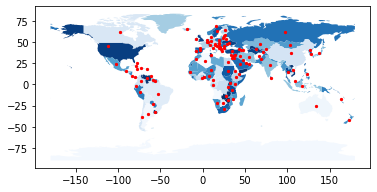

In [16]:
# Access built-in Natural Earth data via GeoPandas
select_country = world.loc[world['name'].isin(summer_list)]
select_US  = world.loc[world['name'] == "United States of America"]
select_country = pd.concat([select_country, select_US])
centroids = select_country.centroid 
centroid_list = pd.concat([select_country.name, centroids], axis=1)
base = world.plot(column = 'name', cmap = 'Blues')
centroids.plot(ax = base, marker = 'o', color = 'red', markersize = 5).get_figure().savefig('summer_winners.png')

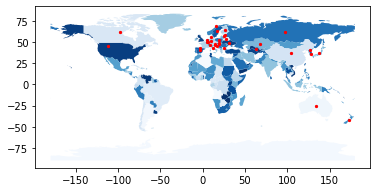

In [18]:
select_country = world.loc[world['name'].isin(winter_list)]
select_US  = world.loc[world['name'] == "United States of America"]
select_country = pd.concat([select_country, select_US])
centroids = select_country.centroid 
centroid_list = pd.concat([select_country.name, centroids], axis=1)
base = world.plot(column = 'name', cmap = 'Blues')
centroids.plot(ax = base, marker = 'o', color = 'red', markersize = 5).get_figure().savefig('winter_winners.png')